In [2]:
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.append(str(project_root))
from visualization.utils import defaultColors

In [3]:
# from mobo.surrogate_model import BoTorchSurrogateModelReapeat, BoTorchSurrogateModel
import numpy as np
import torch
import pandas as pd
from pathlib import Path
import numpy as np

In [4]:
# .\result\exp4d\optimization_4\marsdet\0\state_dict_noise.pt

path = Path("../result/exp4d/unroll_new/marsdet/0/")
# path = Path("../result/exp/unroll_new/raqnehvi/0/")
# path = Path("../result/peaksS5R3/default/mars/0/")
# path = Path("../result/peaks/default/qnehvi/0/")

# state_dict = torch.load(path / "state_dict.pt")
# state_dict_noise = torch.load(path / "state_dict_noise.pt")

eval_samples = pd.read_csv(path / "EvaluatedSamples.csv")
eval_samples.columns.to_list()


# train_X = eval_samples[["x1", "x2", "x3", "x4"]].values
# use pandas filter to select columns
train_X = eval_samples.filter(regex="^x[0-9]").values
train_Y = eval_samples.filter(regex="^f[0-9]").values
train_Yvar = eval_samples.filter(regex="^rho_f[0-9]").values

import torch

# np to torch
train_X = torch.tensor(train_X, dtype=torch.float64)
train_Y = -torch.tensor(train_Y, dtype=torch.float64)
train_Yvar = torch.tensor(train_Yvar, dtype=torch.float64)

# min max bounds from train_X
bounds = torch.stack([train_X.min(0)[0], train_X.max(0)[0]])


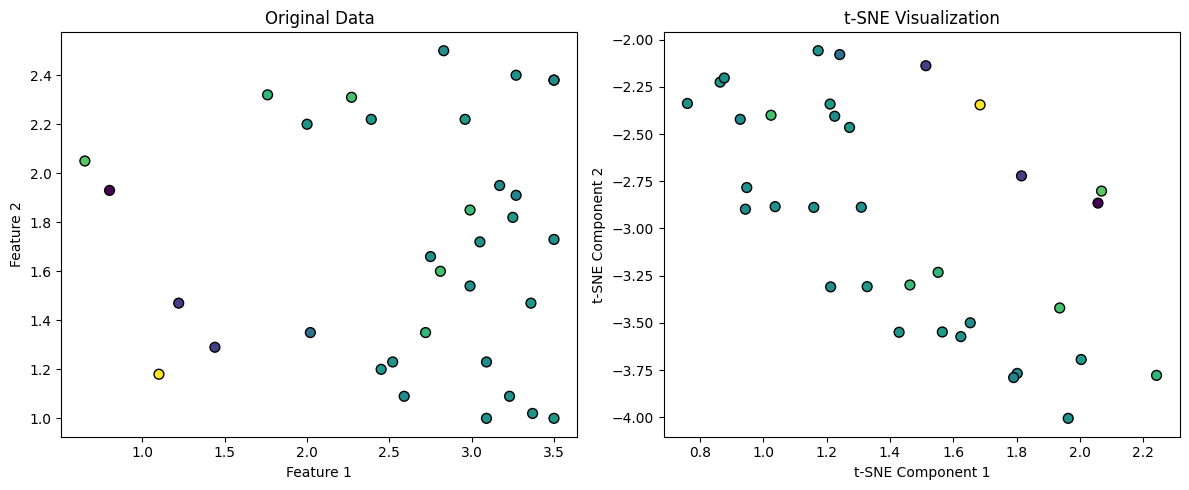

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# Generate synthetic data with two clusters
X = train_X.numpy()
y = train_Y.log().numpy()[:, 1]

# Apply t-SNE to reduce dimensionality to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Plot the original data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 3], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the t-SNE representation
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()
